# Unit 5 - Financial Planning

In [8]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [9]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [10]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3



In [11]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [12]:
# Fetch current BTC price
response_btc = requests.get(btc_url)
btc_data = response_btc.json()
# Fetch current ETH price
response_etc = requests.get(eth_url)
etc_data = response_etc.json()
# Compute current value of my crpto
#use response
BTC_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = BTC_price * my_btc

ETH_price = etc_data["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = ETH_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $47899.20
The current value of your 5.3 ETH is $15971.76


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret

api_key= os.getenv("ALPACA_API_KEY")
sec_key= os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    api_key,
    sec_key,
    api_version="v2"
)


In [15]:
# Format current date as ISO format

today = pd.Timestamp("2022-04-11", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data

AGG = df_portfolio[df_portfolio["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_portfolio[df_portfolio["symbol"]=="SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames

df_portfolio = pd.concat([AGG,SPY],axis=1, keys=["AGG", "SPY"])
# Preview DataFrame
df_portfolio.index = df_portfolio.index.date
df_portfolio

AGG                                                            \
              open     high     low   close   volume trade_count        vwap   
2022-04-11  104.44  104.505  104.17  104.28  8377902       29767  104.312835   

               SPY                                                           
              open   high     low   close    volume trade_count        vwap  
2022-04-11  444.11  445.0  439.39  439.92  89825549      779421  442.206374

In [16]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $104.28
Current SPY closing price: $439.92


In [17]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21996.00
The current value of your 200 AGG shares is $20856.00


### Savings Health Analysis

In [18]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
crypto_assets = my_btc_value + my_eth_value
shares_assets = my_agg_value + my_spy_value
# Create savings DataFrame
# YOUR CODE HERE!
assets_df = (crypto_assets, shares_assets)
#total_assets.columns = ["Amount"]
df_savings = pd.DataFrame(assets_df, columns=["Amount"], index=["Crypto", "Shares"])
# Display savings DataFrame
display(df_savings)


,Amount
Crypto,63870.962
Shares,42852.000


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

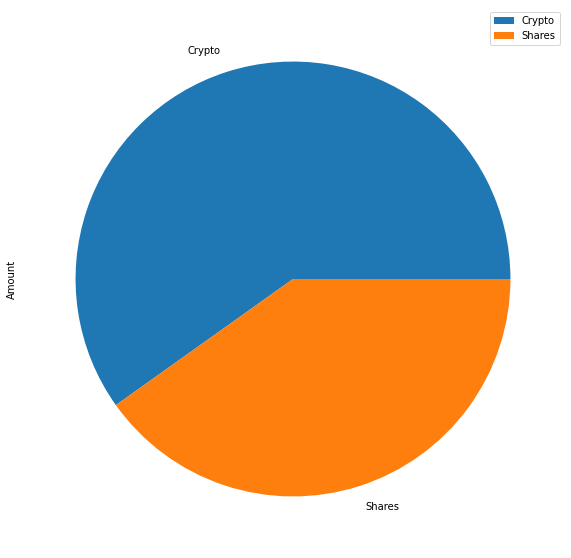

In [19]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(subplots=True, figsize=(20,10))

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_assets + shares_assets
if total_savings > emergency_fund:
    print("Congratulations, you have enough savings")
elif total_savings == emergency_fund:
    print("Congratulations, you have reached your financial goal")
else :
    print(f"You are $ ({emergency_fund - total_savings}) away from reaching your goal")

# Validate saving health
# YOUR CODE HERE!

Congratulations, you have enough savings


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
#tickers variable was already created
timeframe = "1Day"

# Get current closing prices for SPY and AGG

df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data

AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames

df_stock_data = pd.concat([AGG,SPY],axis=1, keys=["AGG", "SPY"])
# Preview DataFrame
df_stock_data.index = df_stock_data.index.date
df_stock_data

# Display sample data
df_stock_data.head()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-02  110.74  110.7400  110.5200  110.61  3553939       15119   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                           SPY                                                 \
                  vwap    open    high     low   close     volume trade_count   
2016-05-02  110.627199  206.90  208.18  206.41  208.03   61908515      263580   
2016-05-03  110.865995  206.50  206.80  205.28  206.13  106422142      377518   
2016-05-04  110.879063  205.00  205.85  204.42  204.96   92199810      345261   
2016-05-05  111.028363  205.57  205.98  204.47  204.95   67597222      280622   
2016-05-06  111.031967  204.04  205.77  203.88  205.70   89131004      340335   

                        
                  vwap  
2016-05-02  207.294812  
2016-05-03  206.312060  
2016-05-04  205.090172  
2016-05-05  205.141555  
2016-05-06  204.937074

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims = 500

MC_30_year = MCSimulation(
    portfolio_data= df_stock_data,
    weights = [.40, .60],
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)

In [24]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30_year.portfolio_data.head().dropna()

AGG                                                   \
              open      high       low   close   volume trade_count   
2016-05-03  110.89  110.9450  110.7500  110.81  3044940       15662   
2016-05-04  110.91  110.9315  110.7595  110.86  2920608       13982   
2016-05-05  110.92  111.1600  110.8010  111.14  3008142       15707   
2016-05-06  111.12  111.1200  110.9700  110.97  2718710       12697   

                                        SPY                          \
                  vwap daily_return    open    high     low   close   
2016-05-03  110.865995     0.001808  206.50  206.80  205.28  206.13   
2016-05-04  110.879063     0.000451  205.00  205.85  204.42  204.96   
2016-05-05  111.028363     0.002526  205.57  205.98  204.47  204.95   
2016-05-06  111.031967    -0.001530  204.04  205.77  203.88  205.70   

                                                            
               volume trade_count        vwap daily_return  
2016-05-03  106422142      377518  206.312060    -0.009133  
2016-05-04   92199810      345261  205.090172    -0.005676  
2016-05-05   67597222      280622  205.141555    -0.000049  
2016-05-06   89131004      340335  204.937074     0.003659

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
simulated_returns = MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\themi\Rutgers\api-homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

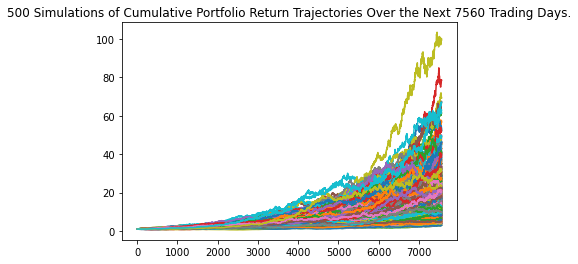

In [48]:
# Plot simulation outcomes
# YOUR CODE HERE!
sim_plot = MC_30_year.plot_simulation()
#Note: could not find code that made plot larger in size. (".figure" and "figsize=" did not work)


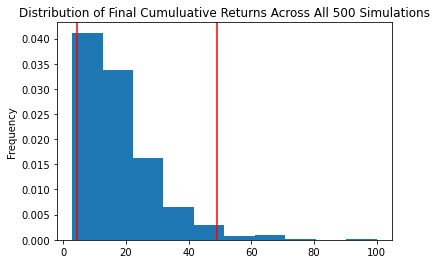

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HER
confidence_table = MC_30_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(confidence_table)

count           500.000000
mean             18.271766
std              12.272909
min               2.819581
25%               9.873429
50%              15.341586
75%              22.764455
max              99.982120
95% CI Lower      4.261736
95% CI Upper     49.060550
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(confidence_table[8]*initial_investment,2)
ci_upper = round(confidence_table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $85234.72 and $981211.0


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(confidence_table[8]*initial_investment,2)
ci_upper = round(confidence_table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $127852.07 and $1471816.5


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [34]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [36]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


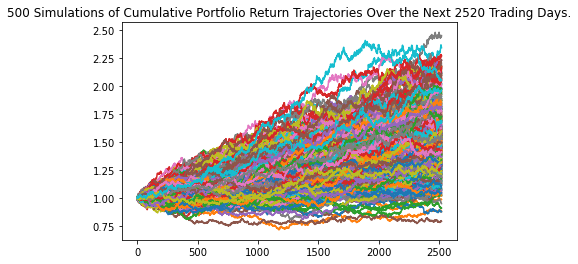

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

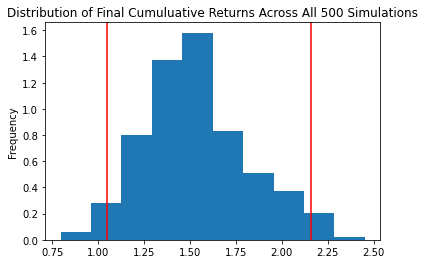

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
